# Olivetti Faces Dataset Problem using *MLPClassifier*

> We use a Multi-Layer Perceptron Classifier on the AT & T Olivetti Faces Dataset to classify human facial expressions under any one of the 40 different categories.This is however a simplified implementation for beginners. Many improvements can be made to this such as using PCA (Principal Component Analysis) , tensorflow CNN (Convolutional Neural Network), etc.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Classification report for classifier MLPClassifier(hidden_layer_sizes=200):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3
     

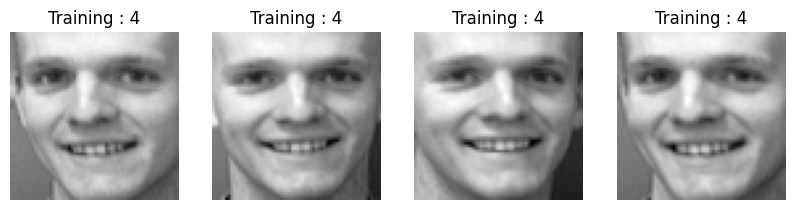

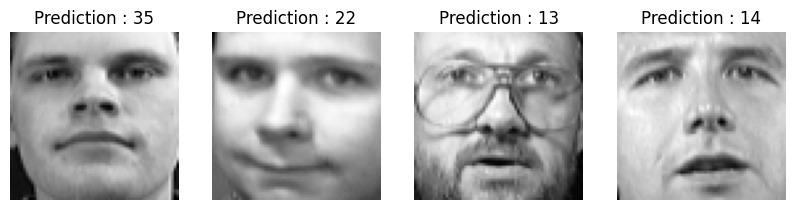

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets , metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

ds = sklearn.datasets.fetch_olivetti_faces()
ds.images.shape , ds.target.shape
IMG_SIZE = 64

# Plot training samples
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,4))
for axis,image,label in zip(axes,ds.images[40:],ds.target[40:]):
  axis.set_axis_off()
  axis.imshow(image,cmap="gray")
  axis.set_title("Training : {}".format(label))
n_samples = len(ds.images)
data = ds.images.reshape(n_samples,-1)

# Creating MLP Model
model = MLPClassifier(hidden_layer_sizes=(200))
X_train , X_test , Y_train , Y_test = train_test_split(data,ds.target,test_size=0.2,shuffle=True)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,4))
#Plotting Predictions
for axis,image,label in zip(axes,X_test,y_pred):
  axis.set_axis_off()
  image = image.reshape(IMG_SIZE,IMG_SIZE)
  axis.imshow(image,cmap="gray")
  axis.set_title("Prediction : {}".format(label))
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Y_test, y_pred)}\n"
)